# Swift DeepSky .vs. LaMassa

We ran the deepsky pipeline where LaMassa-Chandra has observed.

Let's see how our swift catalog compares with matches with Lamassa data.
The swift catalog is the unique sources catalog.

In [1]:
swift_file = 'table_flux_detections_lamassa_unique.csv'

In [2]:
%matplotlib notebook
# %matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(swift_file)
df.describe()

,ID,NH,ENERGY_SLOPE,nufnu_5keV(erg.s-1.cm-2),nufnu_error_5keV(erg.s-1.cm-2),nufnu_0.5keV(erg.s-1.cm-2),nufnu_error_0.5keV(erg.s-1.cm-2),upper_limit_0.5keV(erg.s-1.cm-2),nufnu_1.5keV(erg.s-1.cm-2),nufnu_error_1.5keV(erg.s-1.cm-2),upper_limit_1.5keV(erg.s-1.cm-2),nufnu_4.5keV(erg.s-1.cm-2),nufnu_error_4.5keV(erg.s-1.cm-2),upper_limit_4.5keV(erg.s-1.cm-2)
count,1079.000000,1.079000e+03,1079.000000,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03,1.079000e+03
mean,1018.443930,4.597396e+20,0.745594,1.123217e-11,2.654995e-14,6.604700e-12,-9.984959e-13,-9.443744e+02,8.864537e-12,-3.594645e-12,-9.323383e+02,1.078167e-11,-5.504448e-12,-9.064143e+02
std,598.554711,3.092824e+20,0.356392,1.674126e-10,1.769790e-13,1.138800e-10,6.269327e-12,2.272330e+02,1.411701e-10,4.566946e-11,2.494172e+02,1.610108e-10,2.576469e-11,2.898256e+02
min,3.000000,1.920000e+20,-1.016000,2.158200e-15,0.000000e+00,0.000000e+00,-9.590400e-11,-9.990000e+02,0.000000e+00,-1.420850e-09,-9.990000e+02,0.000000e+00,-3.388560e-10,-9.990000e+02
25%,489.500000,2.635000e+20,0.799000,1.526155e-14,3.328200e-15,6.187325e-15,2.450835e-15,-9.990000e+02,1.020140e-14,3.244630e-15,-9.990000e+02,1.314650e-14,4.021325e-15,-9.990000e+02
50%,1048.000000,3.190000e+20,0.800000,2.819340e-14,7.111100e-15,1.502440e-14,5.962520e-15,-9.990000e+02,2.216380e-14,8.239640e-15,-9.990000e+02,2.913140e-14,1.090750e-14,-9.990000e+02
75%,1478.000000,5.030000e+20,0.800000,6.462540e-14,1.280000e-14,3.922200e-14,1.156610e-14,-9.990000e+02,5.588570e-14,1.602425e-14,-9.990000e+02,6.910105e-14,2.107255e-14,-9.990000e+02
max,2021.000000,1.180000e+21,3.321000,3.779140e-09,2.989680e-12,3.317730e-09,2.506400e-12,1.657050e-10,3.602330e-09,3.183580e-12,2.372670e-10,3.706760e-09,4.577300e-12,3.571620e-10


## Cleaning: column names

In [4]:
# Let's clean the column names...just to clear the ease the access
import re
_unit = '(erg.s-1.cm-2)'
renam_cols = {}
for c in df.columns:
    nc = c
    if _unit in c:
        _i = re.search(_unit,c).start() -1
        nc = c[:_i]
    renam_cols[c] = nc

df.rename(columns=renam_cols, inplace=True)
df.head()

,ID,RA,DEC,NH,ENERGY_SLOPE,ENERGY_SLOPE_ERROR,nufnu_5keV,nufnu_error_5keV,nufnu_0.5keV,nufnu_error_0.5keV,upper_limit_0.5keV,nufnu_1.5keV,nufnu_error_1.5keV,upper_limit_1.5keV,nufnu_4.5keV,nufnu_error_4.5keV,upper_limit_4.5keV
0,10,01:26:58.795,-01:14:17.195,3.670000e+20,-0.020,+0.17/-0.14,5.346740e-13,5.346740e-14,7.917950e-14,1.500040e-14,-999.0,1.060040e-13,2.316250e-14,-9.990000e+02,4.780300e-13,6.606760e-14,-9.990000e+02
1,11,01:26:42.199,-01:14:07.136,3.710000e+20,1.820,+0.18/-0.14,9.830070e-14,6.259200e-15,5.693350e-13,4.693000e-14,-999.0,3.317110e-13,3.624540e-14,-9.990000e+02,1.050400e-13,2.276120e-14,-9.990000e+02
2,12,01:26:32.618,-01:12:21.290,3.730000e+20,0.800,-999/-999,4.567580e-14,1.022710e-14,3.811650e-14,1.211480e-14,-999.0,5.209630e-14,1.655820e-14,-9.990000e+02,1.361950e-14,-3.503620e-11,5.930200e-11
3,3,01:26:27.323,-01:18:13.705,3.780000e+20,0.800,-999/-999,4.036140e-14,1.418400e-14,6.748230e-14,2.371500e-14,-999.0,3.065140e-14,-3.227770e-11,7.901590e-11,1.285420e-14,-4.851900e-11,1.187750e-10
4,13,01:27:22.695,-01:15:59.333,3.620000e+20,1.131,+0.35/-0.24,5.606770e-14,8.933920e-15,6.344500e-14,1.552790e-14,-999.0,7.948320e-14,1.945320e-14,-9.990000e+02,5.599000e-14,1.943960e-14,-9.990000e+02


## Cleaning: energy-slope error

In [5]:
inds = df['ENERGY_SLOPE_ERROR'].str.contains('-999')
df.loc[inds,'ENERGY_SLOPE_ERROR'] = None
df.head()

,ID,RA,DEC,NH,ENERGY_SLOPE,ENERGY_SLOPE_ERROR,nufnu_5keV,nufnu_error_5keV,nufnu_0.5keV,nufnu_error_0.5keV,upper_limit_0.5keV,nufnu_1.5keV,nufnu_error_1.5keV,upper_limit_1.5keV,nufnu_4.5keV,nufnu_error_4.5keV,upper_limit_4.5keV
0,10,01:26:58.795,-01:14:17.195,3.670000e+20,-0.020,+0.17/-0.14,5.346740e-13,5.346740e-14,7.917950e-14,1.500040e-14,-999.0,1.060040e-13,2.316250e-14,-9.990000e+02,4.780300e-13,6.606760e-14,-9.990000e+02
1,11,01:26:42.199,-01:14:07.136,3.710000e+20,1.820,+0.18/-0.14,9.830070e-14,6.259200e-15,5.693350e-13,4.693000e-14,-999.0,3.317110e-13,3.624540e-14,-9.990000e+02,1.050400e-13,2.276120e-14,-9.990000e+02
2,12,01:26:32.618,-01:12:21.290,3.730000e+20,0.800,None,4.567580e-14,1.022710e-14,3.811650e-14,1.211480e-14,-999.0,5.209630e-14,1.655820e-14,-9.990000e+02,1.361950e-14,-3.503620e-11,5.930200e-11
3,3,01:26:27.323,-01:18:13.705,3.780000e+20,0.800,None,4.036140e-14,1.418400e-14,6.748230e-14,2.371500e-14,-999.0,3.065140e-14,-3.227770e-11,7.901590e-11,1.285420e-14,-4.851900e-11,1.187750e-10
4,13,01:27:22.695,-01:15:59.333,3.620000e+20,1.131,+0.35/-0.24,5.606770e-14,8.933920e-15,6.344500e-14,1.552790e-14,-999.0,7.948320e-14,1.945320e-14,-9.990000e+02,5.599000e-14,1.943960e-14,-9.990000e+02


In [6]:
print('Amount of Energy-slope adhoc: {:d}'.format(sum(df['ENERGY_SLOPE_ERROR'].isnull())))

Amount of Energy-slope adhoc: 609


## Plot: energy-slope

<IPython.core.display.Javascript object>


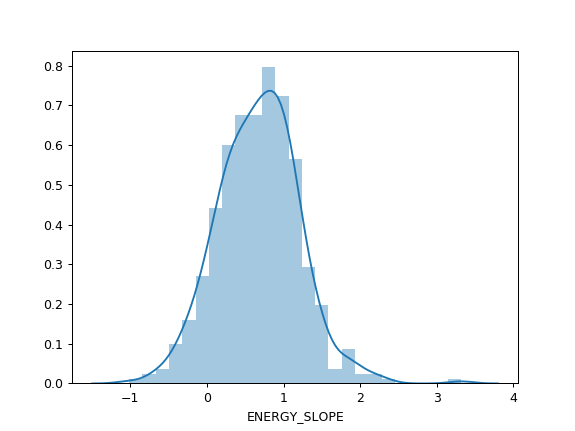

In [9]:
eslope = df.loc[~df['ENERGY_SLOPE_ERROR'].isnull(),'ENERGY_SLOPE']

sns.distplot(eslope)

## Plot: flux distributions

/home/chbrandt/.conda/envs/swift/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


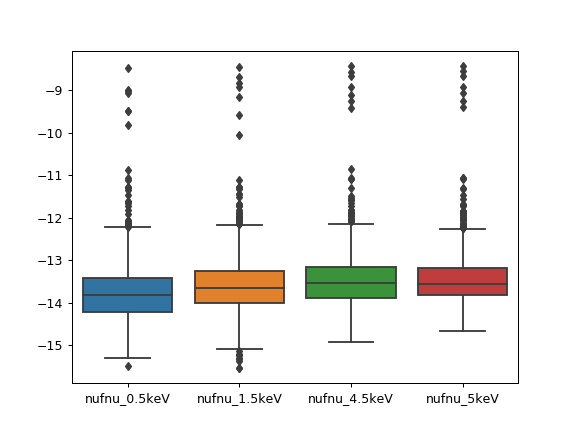

In [10]:
sns.boxplot(data=np.log10(df[['nufnu_0.5keV','nufnu_1.5keV','nufnu_4.5keV','nufnu_5keV']]))